In [1]:
import pandas as pd

import torch

from fedcore_lossreg.preprocessing.convert import convert_df_to_dl
from fedcore_lossreg.models.model_repository import MLP, L2Regression
from fedcore_lossreg.loss_functions.loss_repository import LaiLoss

In [2]:
torch.manual_seed(42)

In [3]:
# Get data
train = pd.read_csv('data/kaggle_s3e1/train.csv')
X_test = pd.read_csv('data/kaggle_s3e1/test.csv')

train.drop(columns='id', inplace=True)
X_test.drop(columns='id', inplace=True)

X_train, y_train = train.drop(columns='MedHouseVal'), train['MedHouseVal']

# Convert to data loader
train_dl = convert_df_to_dl(X_train, y_train)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)

In [4]:
# # Base MLP model
# mlp_model = MLP(input_size=X_train.shape[1], output_size=1)
# mlp_model.fit(num_epochs=1000, train_dl=train_dl, silent=True)
# y_pred = mlp_model.predict(X_test)

Model L2Regression with the loss function MSELoss
Epoch 10/300, Loss 33.5538
Epoch 20/300, Loss 20.3777
Epoch 30/300, Loss 5.9929
Epoch 40/300, Loss 1.7499
Epoch 50/300, Loss 0.2772
Epoch 60/300, Loss 0.8679
Epoch 70/300, Loss 0.2649
Epoch 80/300, Loss 0.6806
Epoch 90/300, Loss 0.1775
Epoch 100/300, Loss 0.6161
Epoch 110/300, Loss 1.3214
Epoch 120/300, Loss 0.1990
Epoch 130/300, Loss 0.9307
Epoch 140/300, Loss 1.7791
Epoch 150/300, Loss 0.5312
Epoch 160/300, Loss 0.4817
Epoch 170/300, Loss 0.5714
Epoch 180/300, Loss 0.4429
Epoch 190/300, Loss 0.5008
Epoch 200/300, Loss 0.4327
Epoch 210/300, Loss 1.1667
Epoch 220/300, Loss 0.4108
Epoch 230/300, Loss 0.5589
Epoch 240/300, Loss 0.8150
Epoch 250/300, Loss 0.5569
Epoch 260/300, Loss 0.6939
Epoch 270/300, Loss 0.8934
Epoch 280/300, Loss 0.3644
Epoch 290/300, Loss 0.4146
Epoch 300/300, Loss 0.2728
Fitting complete in 81.460 seconds!
Plotting the loss curve:


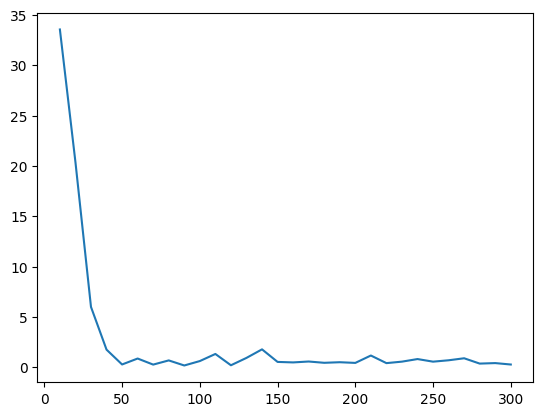

In [5]:
# Base Ridge model
ridge_model = L2Regression(input_size=X_train.shape[1], output_size=1)
ridge_model.fit(
    num_epochs=300,
    train_dl=train_dl,
    plot_loss=True,
    verbosity=10,
    loss_step=10
)
y_pred_ridge = ridge_model.predict(X_test)

Model L2Regression with the loss function LaiLoss
Epoch 10/300, Loss 20956.1035
Epoch 20/300, Loss 1163.7164
Epoch 30/300, Loss 535.4062
Epoch 40/300, Loss 22.4820
Epoch 50/300, Loss 8.8256
Epoch 60/300, Loss 2.2748
Epoch 70/300, Loss 0.7460
Epoch 80/300, Loss 1.0215
Epoch 90/300, Loss 0.7256
Epoch 100/300, Loss 0.4568
Epoch 110/300, Loss 0.6921
Epoch 120/300, Loss 1.2483
Epoch 130/300, Loss 0.7935
Epoch 140/300, Loss 0.6789
Epoch 150/300, Loss 1.2412
Epoch 160/300, Loss 0.5361
Epoch 170/300, Loss 0.7464
Epoch 180/300, Loss 0.9563
Epoch 190/300, Loss 0.5482
Epoch 200/300, Loss 0.6340
Epoch 210/300, Loss 1.2017
Epoch 220/300, Loss 0.3593
Epoch 230/300, Loss 0.2210
Epoch 240/300, Loss 0.2995
Epoch 250/300, Loss 0.5755
Epoch 260/300, Loss 0.8702
Epoch 270/300, Loss 0.6370
Epoch 280/300, Loss 0.1858
Epoch 290/300, Loss 1.6745
Epoch 300/300, Loss 0.2871
Fitting complete in 99.544 seconds!
Plotting the loss curve:


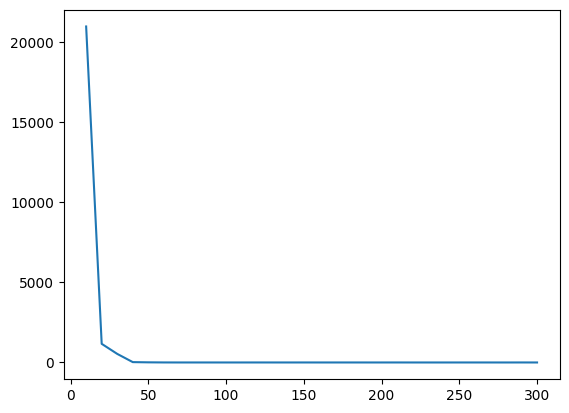

In [6]:
# Ridge model with LaiLoss
ridge_model_lai = L2Regression(
    input_size=X_train.shape[1],
    output_size=1,
    loss_func=LaiLoss,
    loss_kwargs={'alpha': 1}
)
ridge_model_lai.fit(
    num_epochs=300,
    train_dl=train_dl,
    plot_loss=True,
    verbosity=10,
    loss_step=10
)
y_pred_lai = ridge_model_lai.predict(X_test)

In [8]:
submission = pd.read_csv('data/kaggle_s3e1/sample_submission.csv')
submission['MedHouseVal'] = y_pred_lai
submission.to_csv('submission.csv', index=False)